In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [32]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [33]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key


In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maumere
Processing Record 2 of Set 1 | miandrivazo
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | nouadhibou
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | kloulklubed
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bubaque
Processing Record 14 of Set 1 | komsomolskiy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | colares
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | georgetown
Processing 

Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | marawi
Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | san alfonso
Processing Record 41 of Set 4 | mwinilunga
Processing Record 42 of Set 4 | eten
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | lewistown
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | rungata
City not found. Skipping...
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | aksu
Processing Record 4 of Set 5 | millau
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | 

Processing Record 24 of Set 8 | chagda
City not found. Skipping...
Processing Record 25 of Set 8 | zhangye
Processing Record 26 of Set 8 | jinka
Processing Record 27 of Set 8 | tostamaa
City not found. Skipping...
Processing Record 28 of Set 8 | zarnovica
Processing Record 29 of Set 8 | parabel
Processing Record 30 of Set 8 | taoudenni
Processing Record 31 of Set 8 | fomboni
Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | jacareacanga
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | salekhard
Processing Record 36 of Set 8 | shubarshi
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | smithers
Processing Record 39 of Set 8 | koceljeva
Processing Record 40 of Set 8 | mae hong son
Processing Record 41 of Set 8 | harindanga
Processing Record 42 of Set 8 | lunenburg
Processing Record 43 of Set 8 | kapit
Processing Record 44 of Set 8 | sinkat
City not found. Skipping...
Processing Record 45 of Set 8 | antofagasta
Processing Record 4

Processing Record 12 of Set 12 | almeria
Processing Record 13 of Set 12 | varca
Processing Record 14 of Set 12 | hervey bay
Processing Record 15 of Set 12 | lavrentiya
Processing Record 16 of Set 12 | bayangol
Processing Record 17 of Set 12 | hambantota
Processing Record 18 of Set 12 | chengde
Processing Record 19 of Set 12 | kalabo
Processing Record 20 of Set 12 | saint-pierre
Processing Record 21 of Set 12 | katobu
Processing Record 22 of Set 12 | thinadhoo
Processing Record 23 of Set 12 | celestun
Processing Record 24 of Set 12 | staritsa
Processing Record 25 of Set 12 | acari
Processing Record 26 of Set 12 | libertador general san martin
Processing Record 27 of Set 12 | aklavik
Processing Record 28 of Set 12 | awjilah
Processing Record 29 of Set 12 | kihurio
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | cabo san lucas
Processing Record 32 of Set 12 | gambo
Processing Record 33 of Set 12 | vaitape
Processing Record 34 of Set 12 | apoldu de jos
Proces

564

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.6199,122.2111,78.93,83,89,4.27,ID,2022-03-26 20:47:37
1,Miandrivazo,-19.5167,45.4667,77.36,92,34,2.77,MG,2022-03-26 20:47:37
2,Kavaratti,10.5669,72.6420,81.68,71,1,3.62,IN,2022-03-26 20:47:38
3,Nouadhibou,20.9310,-17.0347,64.38,88,0,12.66,MR,2022-03-26 20:47:38
4,Cape Town,-33.9258,18.4232,65.26,68,0,10.36,ZA,2022-03-26 20:43:50
5,Puerto Ayora,-0.7393,-90.3518,80.56,76,51,9.15,EC,2022-03-26 20:47:39
6,Chokurdakh,70.6333,147.9167,-2.13,97,99,8.75,RU,2022-03-26 20:47:39
7,Vaini,-21.2000,-175.2000,78.96,73,40,8.05,TO,2022-03-26 20:47:39
8,Kloulklubed,7.0419,134.2556,79.30,80,100,13.98,PW,2022-03-26 20:47:40
9,Rikitea,-23.1203,-134.9692,79.18,73,4,13.11,PF,2022-03-26 20:47:41


In [47]:
#reorder columns and assign new dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2022-03-26 20:47:37,-8.6199,122.2111,78.93,83,89,4.27
1,Miandrivazo,MG,2022-03-26 20:47:37,-19.5167,45.4667,77.36,92,34,2.77
2,Kavaratti,IN,2022-03-26 20:47:38,10.5669,72.6420,81.68,71,1,3.62
3,Nouadhibou,MR,2022-03-26 20:47:38,20.9310,-17.0347,64.38,88,0,12.66
4,Cape Town,ZA,2022-03-26 20:43:50,-33.9258,18.4232,65.26,68,0,10.36
...,...,...,...,...,...,...,...,...,...
559,Mogadishu,SO,2022-03-26 21:03:46,2.0371,45.3438,81.30,81,25,11.01
560,Cap Malheureux,MU,2022-03-26 21:03:46,-19.9842,57.6142,79.47,83,2,1.99
561,Majene,ID,2022-03-26 21:03:46,-3.5403,118.9707,77.83,85,99,3.13
562,Hwange,ZW,2022-03-26 21:03:47,-18.3693,26.5019,71.42,80,6,1.25


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

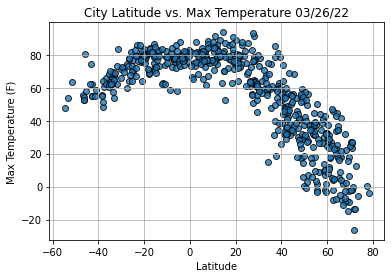

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

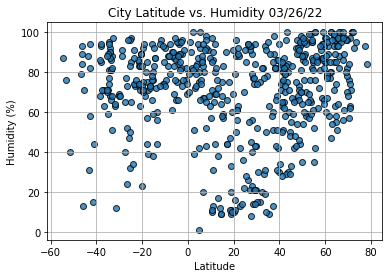

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

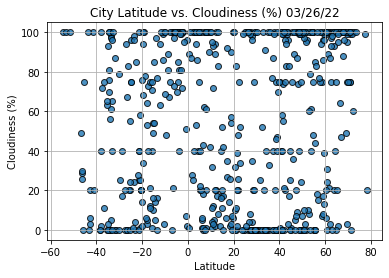

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

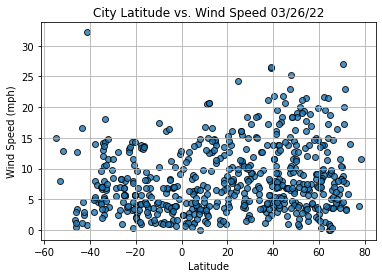

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()